### идея за всем
### Power diagram или диаграмма Лагерра-Вороного

Расстояние считается как  $d(s, s_i) = ||s-s_i||^2 - w_i$, где $w_i$ это вес точки

код Gemini

In [1]:
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, box

def power_voronoi_2d(locations, prices):
    """
    Строит Power Diagram через трансформацию для стандартного алгоритма Вороного.
    Для квадратичных издержек: вес w_i = -p_i - ||loc_i||^2
    """
    # В модели Хотеллинга с квадратичными издержками граница между i и j:
    # 2x(xi - xj) + 2y(yi - yj) = pi - pj + xi^2 + yi^2 - xj^2 - yj^2
    # Это эквивалентно Power Diagram с весами w_i = -p_i
    
    # Чтобы использовать scipy.spatial.Voronoi для Power Diagram, 
    # нужно сделать небольшую хитрость с увеличением размерности или 
    # воспользоваться тем, что это радикальные оси окружностей.
    # Но проще всего для N=3 и равномерного распределения использовать 
    # прямое пересечение полуплоскостей.
    
    N = len(locations)
    square = box(0, 0, 1, 1) # Единичный квадрат
    polygons = []

    for i in range(N):
        poly = square
        for j in range(N):
            if i == j: continue
            
            # Строим разделяющую прямую (линию равных издержек) между i и j:
            # 2*(loc_i - loc_j) * X = p_j - p_i + |loc_i|^2 - |loc_j|^2
            diff = locations[i] - locations[j]
            norm_i = np.dot(locations[i], locations[i])
            norm_j = np.dot(locations[j], locations[j])
            
            # Константа уравнения прямой: ax + by + c = 0
            a, b = 2 * diff
            c = prices[i] - prices[j] - norm_i + norm_j
            
            # Создаем "очень большой" прямоугольник, представляющий полуплоскость
            # где издержки фирмы i меньше, чем у фирмы j
            large_val = 10 
            if abs(b) > abs(a):
                # Ориентируем по y
                sign = -1 if b > 0 else 1
                half_plane = Polygon([(-large_val, -c/b if b!=0 else 0), (large_val, -c/b if b!=0 else 0), 
                                      (large_val, sign*large_val), (-large_val, sign*large_val)])
            else:
                # Ориентируем по x
                sign = -1 if a > 0 else 1
                half_plane = Polygon([(-c/a if a!=0 else 0, -large_val), (-c/a if a!=0 else 0, large_val), 
                                      (sign*large_val, large_val), (sign*large_val, -large_val)])
            
            # Для корректного поворота полуплоскости используем смещение по вектору нормали
            # Но для стабильности в симуляции лучше использовать формулу через проекцию:
            midpoint = (locations[i] + locations[j]) / 2 + (prices[i] - prices[j])/(2 * np.sum(diff**2)) * diff
            # Строим вектор направления границы (перпендикуляр к diff)
            direction = np.array([-diff[1], diff[0]])
            p1 = midpoint + direction * 10
            p2 = midpoint - direction * 10
            
            # Определяем, с какой стороны от линии находится точка locations[i]
            side_point = midpoint + diff * 10
            line_half_plane = Polygon([p1, p2, side_point]) 
            
            poly = poly.intersection(line_half_plane)
            
        polygons.append(poly)
    
    return polygons

# Пример использования:
locs = np.array([[0.2, 0.5], [0.8, 0.2], [0.7, 0.8]])
ps = np.array([0.1, 0.12, 0.08])

regions = power_voronoi_2d(locs, ps)

for i, reg in enumerate(regions):
    print(f"Фирма {i}: Площадь (Спрос) = {reg.area:.4f}")

Фирма 0: Площадь (Спрос) = 0.4160
Фирма 1: Площадь (Спрос) = 0.2552
Фирма 2: Площадь (Спрос) = 0.3288


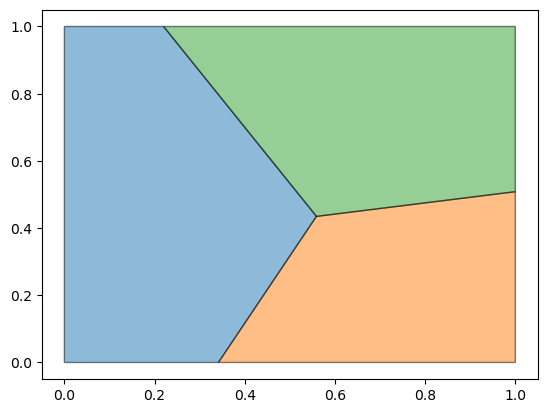

In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Ваши данные
fig, ax = plt.subplots()

# Перебираем полигоны и рисуем каждый
for poly in regions:
    # Получаем координаты x и y
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, edgecolor='black')

plt.show()

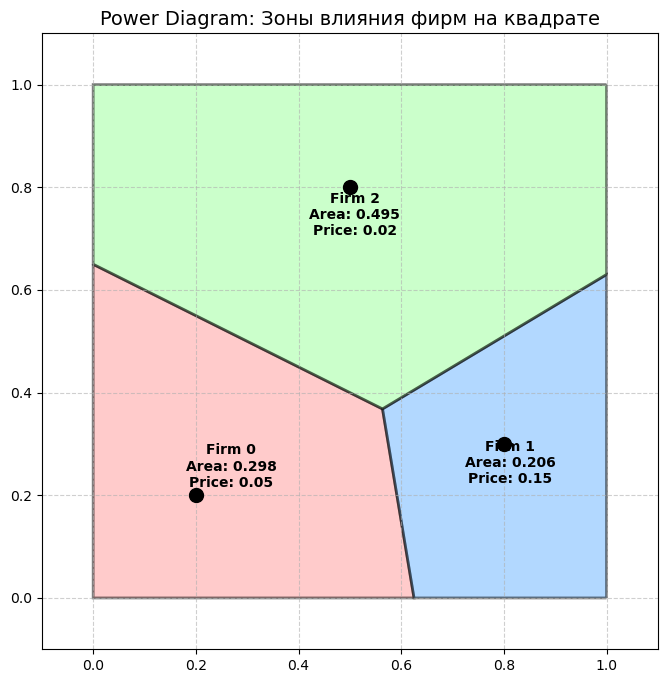

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
from shapely.plotting import plot_polygon
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, box

def power_voronoi_2d(locations, prices):
    """
    Строит Power Diagram через трансформацию для стандартного алгоритма Вороного.
    Для квадратичных издержек: вес w_i = -p_i - ||loc_i||^2
    """
    # В модели Хотеллинга с квадратичными издержками граница между i и j:
    # 2x(xi - xj) + 2y(yi - yj) = pi - pj + xi^2 + yi^2 - xj^2 - yj^2
    # Это эквивалентно Power Diagram с весами w_i = -p_i
    
    # Чтобы использовать scipy.spatial.Voronoi для Power Diagram, 
    # нужно сделать небольшую хитрость с увеличением размерности или 
    # воспользоваться тем, что это радикальные оси окружностей.
    # Но проще всего для N=3 и равномерного распределения использовать 
    # прямое пересечение полуплоскостей.
    
    N = len(locations)
    square = box(0, 0, 1, 1) # Единичный квадрат
    polygons = []

    for i in range(N):
        poly = square
        for j in range(N):
            if i == j: continue
            
            # Строим разделяющую прямую (линию равных издержек) между i и j:
            # 2*(loc_i - loc_j) * X = p_j - p_i + |loc_i|^2 - |loc_j|^2
            diff = locations[i] - locations[j]
            norm_i = np.dot(locations[i], locations[i])
            norm_j = np.dot(locations[j], locations[j])
            
            # Константа уравнения прямой: ax + by + c = 0
            a, b = 2 * diff
            c = prices[i] - prices[j] - norm_i + norm_j
            
            # Создаем "очень большой" прямоугольник, представляющий полуплоскость
            # где издержки фирмы i меньше, чем у фирмы j
            large_val = 10 
            if abs(b) > abs(a):
                # Ориентируем по y
                sign = -1 if b > 0 else 1
                half_plane = Polygon([(-large_val, -c/b if b!=0 else 0), (large_val, -c/b if b!=0 else 0), 
                                      (large_val, sign*large_val), (-large_val, sign*large_val)])
            else:
                # Ориентируем по x
                sign = -1 if a > 0 else 1
                half_plane = Polygon([(-c/a if a!=0 else 0, -large_val), (-c/a if a!=0 else 0, large_val), 
                                      (sign*large_val, large_val), (sign*large_val, -large_val)])
            
            # Для корректного поворота полуплоскости используем смещение по вектору нормали
            # Но для стабильности в симуляции лучше использовать формулу через проекцию:
            midpoint = (locations[i] + locations[j]) / 2 + (prices[i] - prices[j])/(2 * np.sum(diff**2)) * diff
            # Строим вектор направления границы (перпендикуляр к diff)
            direction = np.array([-diff[1], diff[0]])
            p1 = midpoint + direction * 10
            p2 = midpoint - direction * 10
            
            # Определяем, с какой стороны от линии находится точка locations[i]
            side_point = midpoint + diff * 10
            line_half_plane = Polygon([p1, p2, side_point]) 
            
            poly = poly.intersection(line_half_plane)
            
        polygons.append(poly)
    
    return polygons


# --- Данные для примера ---
N = 3
# Локации (x, y)
locs = np.array([[0.2, 0.2], [0.8, 0.3], [0.5, 0.8]])
# Цены (попробуйте поменять, чтобы увидеть, как границы двигаются)
prices = np.array([0.05, 0.15, 0.02]) 

regions = power_voronoi_2d(locs, prices)

# --- Визуализация ---
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, (region, color) in enumerate(zip(regions, colors)):
    if not region.is_empty:
        # Рисуем ячейку
        plot_polygon(region, ax=ax, add_points=False, facecolor=color, alpha=0.5, edgecolor='black', lw=2)
        # Подписываем площадь
        cx, cy = region.centroid.x, region.centroid.y
        ax.text(cx, cy, f"Firm {i}\nArea: {region.area:.3f}\nPrice: {prices[i]}", 
                ha='center', va='center', fontweight='bold')

# Рисуем сами точки фирм
ax.scatter(locs[:, 0], locs[:, 1], c='black', s=100, zorder=5)
# for i, txt in enumerate(range(N)):
#     ax.annotate(f"  Firm {i}", (locs[i, 0], locs[i, 1]), fontsize=12)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal')
ax.set_title("Power Diagram: Зоны влияния фирм на квадрате", fontsize=14)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

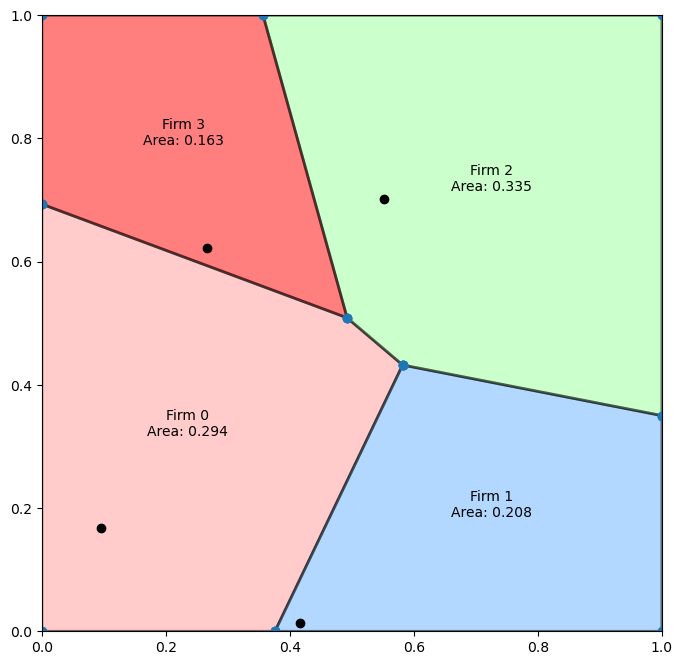

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, box
from shapely.plotting import plot_polygon

def power_voronoi_fast(locations, weights, clip_box=[0, 0, 1, 1]):
    """
    Построение Power Diagram через Convex Hull в 3D.
    Сложность: O(N log N).
    """
    n = len(locations)
    # 1. Лифтинг в 3D: z = x^2 + y^2 - w
    z = np.sum(locations**2, axis=1) - weights
    points_3d = np.hstack([locations, z.reshape(-1, 1)])
    
    # 2. Строим выпуклую оболочку
    hull = ConvexHull(points_3d)
    
    # 3. Находим уравнения всех граней (плоскостей)
    # Уравнение плоскости: Ax + By + Cz + D = 0 => z = (-Ax - By - D) / C
    # Каждая грань задает полупространство z >= f(x, y)
    
    polygons = []
    bounding_poly = box(*clip_box)
    
    for i in range(n):
        poly = bounding_poly
        # Для каждой точки i мы ищем пересечение полуплоскостей, 
        # образованных соседними гранями в 3D
        for j in range(n):
            if i == j: continue
            
            # Граница между i и j в Power Diagram — это проекция пересечения 
            # двух плоскостей, касающихся параболоида в этих точках.
            # Линия: 2x(xi - xj) + 2y(yi - yj) = (xi^2+yi^2-wi) - (xj^2+yj^2-wj)
            
            diff = locations[i] - locations[j]
            const = z[i] - z[j]
            
            # Вектор нормали к прямой в 2D: (a, b)
            a, b = 2 * diff
            # Прямая: ax + by - const = 0
            
            # Строим полуплоскость ax + by <= const
            # (используем очень большой прямоугольник для пересечения)
            large = 10
            if abs(b) > abs(a):
                sign = -1 if b > 0 else 1
                hp = Polygon([(-large, -large * sign), (large, -large * sign), 
                              (large, (const - a * large) / b), (-large, (const + a * large) / b)])
            else:
                sign = -1 if a > 0 else 1
                hp = Polygon([(-large * sign, -large), (-large * sign, large), 
                              ((const - b * large) / a, large), ((const + b * large) / a, -large)])
            
            poly = poly.intersection(hp)
        polygons.append(poly)
        
    return polygons

# --- Тест и визуализация ---
n = 4
locs = np.random.rand(4,2)
prices = np.random.rand(4) / 4
# В вашей модели веса w = -p
weights = -prices 

regions = power_voronoi_fast(locs, weights)

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ff0000']

for i, (reg, col) in enumerate(zip(regions, colors)):
    if not reg.is_empty:
        plot_polygon(reg, ax=ax, facecolor=col, alpha=0.5, edgecolor='black', lw=2)
        ax.text(reg.centroid.x, reg.centroid.y, f"Firm {i}\nArea: {reg.area:.3f}", ha='center')

ax.scatter(locs[:,0], locs[:,1], c='black', zorder=5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

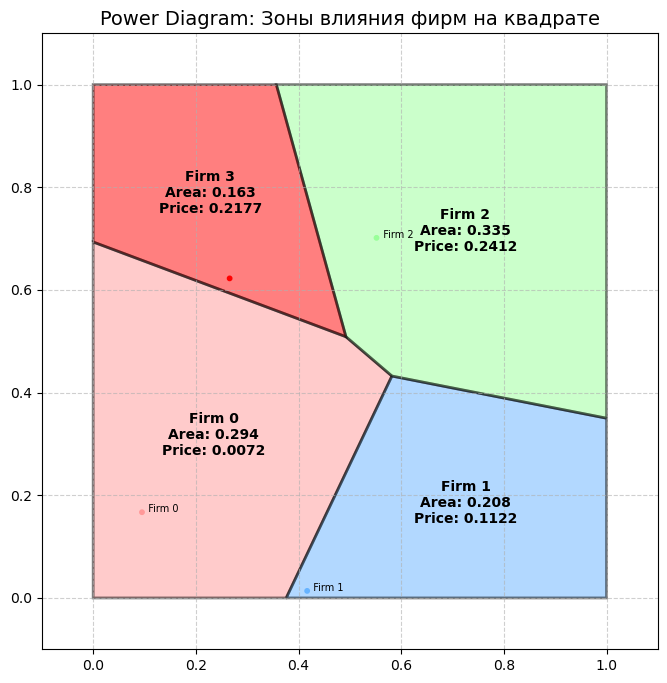

In [5]:
regions = power_voronoi_2d(locs, prices)

# --- Визуализация ---
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ff0000']

for i, (region, color) in enumerate(zip(regions, colors)):
    if not region.is_empty:
        # Рисуем ячейку
        plot_polygon(region, ax=ax, add_points=False, facecolor=color, alpha=0.5, edgecolor='black', lw=2)
        # Подписываем площадь
        cx, cy = region.centroid.x, region.centroid.y
        ax.text(cx, cy, f"Firm {i}\nArea: {region.area:.3f}\nPrice: {round(prices[i],4)}", 
                ha='center', va='center', fontweight='bold')

# Рисуем сами точки фирм
ax.scatter(locs[:, 0], locs[:, 1], c=colors, s=10, zorder=5)
for i, txt in enumerate(range(N)):
    ax.annotate(f"  Firm {i}", (locs[i, 0], locs[i, 1]), fontsize=7)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal')
ax.set_title("Power Diagram: Зоны влияния фирм на квадрате", fontsize=14)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [6]:
def visualize(regions):
    fig, ax = plt.subplots(figsize=(8, 8))
    #colors = ['#ff9999', '#66b3ff', '#99ff99', '#ff0000']
    n = len(regions)
    colors = plt.get_cmap('tab20')(np.linspace(0, 1, n))
    for i, (region, color) in enumerate(zip(regions, colors)):
        if not region.is_empty:
            # Рисуем ячейку
            plot_polygon(region, ax=ax, add_points=False, facecolor=color, alpha=0.5, edgecolor='black', lw=2)
            # Подписываем площадь
            cx, cy = region.centroid.x, region.centroid.y
            ax.text(cx, cy, f"Firm {i}\nArea: {region.area:.3f}\nPrice: {round(prices[i],4)}", 
                    ha='center', va='center', fontweight='bold')
    
    # Рисуем сами точки фирм
    ax.scatter(locs[:, 0], locs[:, 1], c=colors, s=10, zorder=5)
    for i, txt in enumerate(range(N)):
        ax.annotate(f"  Firm {i}", (locs[i, 0], locs[i, 1]), fontsize=7)
    
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_aspect('equal')
    ax.set_title("Power Diagram: Зоны влияния фирм на квадрате", fontsize=14)
    plt.grid(linestyle='--', alpha=0.6)
    plt.show()

Best response

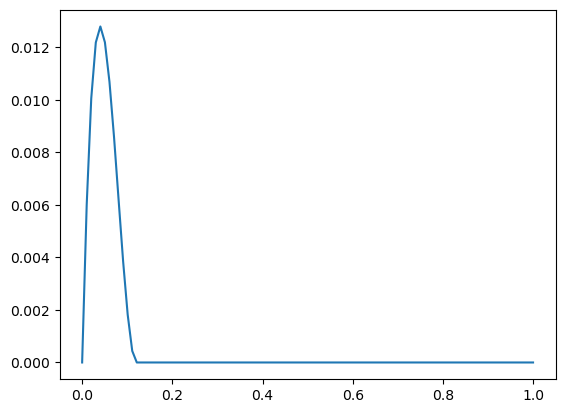

In [7]:
n = 4
#locs = np.random.rand(4,2)
locs = np.array([
    [0.5, 0.5],   # Центр (индекс 0) - мы будем менять его цену
    [0.4, 0.4],   # Окружаем его плотным кольцом
    [0.4, 0.6],
    [0.6, 0.4],
    [0.6, 0.6]
])
prices = np.array([0.2, 0.1, 0.1, 0.1, 0.1])
regions = power_voronoi_2d(locs, prices)

ind = 0

price_grid = np.linspace(0,1,100)
profits = np.zeros(100)
for i, price in enumerate(price_grid):
    prices[ind] = price
    regions = power_voronoi_2d(locs, prices)
    profits[i] = regions[ind].area * price

plt.plot(price_grid, profits)

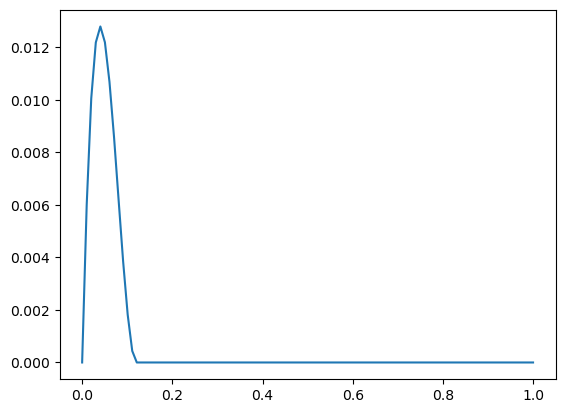

In [8]:
plt.plot(price_grid, profits)

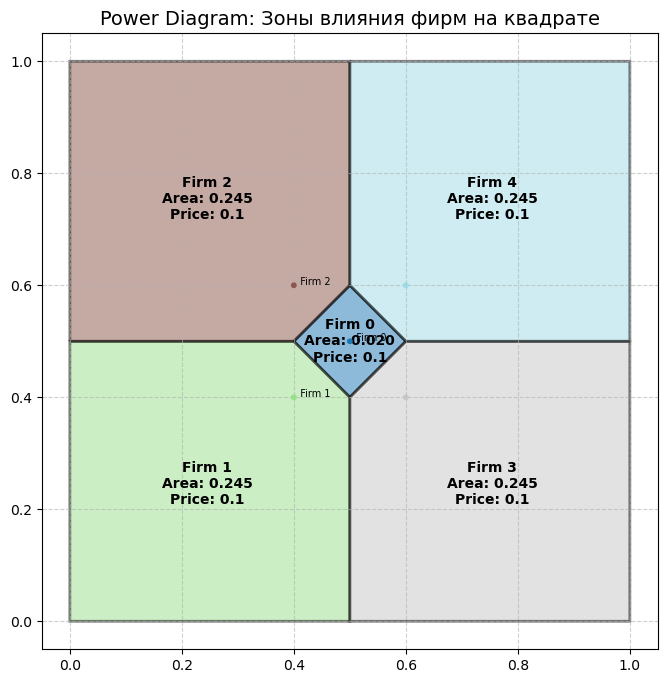

In [9]:
prices[ind] = 0.1
visualize(power_voronoi_2d(locs, prices))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from shapely.geometry import Polygon, box
from shapely.plotting import plot_polygon

class HotellingSimulation:
    def __init__(self, locs, costs, clip_box=[0, 0, 1, 1]):
        self.locs = np.array(locs)
        self.costs = np.array(costs)
        self.n = len(locs)
        self.clip_box = clip_box
        self.history = [] # Здесь будем хранить цены на каждом шаге
        self.profit_history = []

    def get_regions(self, prices):
        """Максимально стабильный расчет Power Diagram"""
        bounding_box = box(*self.clip_box)
        polygons = []
        normalized_prices = prices - np.min(prices)
        weights = -normalized_prices
        
        for i in range(self.n):
            poly = bounding_box
            for j in range(self.n):
                if i == j: continue
                
                # Коэффициенты прямой ax + by + c = 0
                diff = self.locs[j] - self.locs[i]
                norm_i = np.dot(self.locs[i], self.locs[i])
                norm_j = np.dot(self.locs[j], self.locs[j])
                
                a, b = 2 * diff
                c = (norm_i - weights[i]) - (norm_j - weights[j])
                
                # Вместо огромного полигона, строим полуплоскость через "отрезание"
                # Определяем очень большую область, заведомо покрывающую наш квадрат
                large = 100
                if abs(b) > abs(a):
                    sign = -1 if b > 0 else 1
                    hp = Polygon([
                        (-large, (-c - a*(-large))/b), 
                        (large, (-c - a*large)/b), 
                        (large, sign*large), 
                        (-large, sign*large)
                    ])
                else:
                    sign = -1 if a > 0 else 1
                    hp = Polygon([
                        ((-c - b*(-large))/a, -large), 
                        ((-c - b*large)/a, large), 
                        (sign*large, large), 
                        (sign*large, -large)
                    ])
                
                # Трюк: используем buffer(0) для исправления микро-ошибок валидности
                if not hp.is_valid:
                    hp = hp.buffer(0)
                
                try:
                    poly = poly.intersection(hp)
                except Exception:
                    print("error")
                    # Если GEOS все равно ругается, применяем "чистку" к текущему полигону
                    poly = poly.buffer(0.000001).intersection(hp.buffer(0.000001))
            
            # Финальная проверка
            if not poly.is_valid:
                poly = poly.buffer(0)
            polygons.append(poly)
            
        return polygons

    def find_profits(self, prices):
        n = len(prices)
        assert n == len(self.locs)
        regs = self.get_regions(prices)
        profits = [regs[i].area * (prices[i] - self.costs[i]) for i in range(n)]
        return np.array(profits)
    def find_equilibrium(self, initial_prices=None, max_iter=100, lr=1):
        if initial_prices is None:
            # Начинаем с низких, но не нулевых цен
            prices = np.array([0.2] * self.n)
        else:
            prices = np.array(initial_prices)
        
        self.history = [prices.copy()]
        
        for it in range(max_iter):
            start_prices = self.history[-1].copy()
            updated_prices = self.history[-1].copy()
            profits = np.zeros(self.n)
            
            for i in range(self.n):
                def objective(p_i):
                    temp_p = updated_prices.copy()
                    temp_p[i] = p_i
                    regs = self.get_regions(temp_p)
                    area = regs[i].area if not regs[i].is_empty else 0
                    eps = 1e-12
                    return -(p_i - self.costs[i]) * area + eps * p_i
                    
                res = minimize_scalar(objective, bounds = (self.costs[i], 2), method='bounded')
                updated_prices[i] = lr * res.x + (1-lr) * updated_prices[i]
                if res.fun == 0:
                    print("Найден ноль прибыли")
                profits[i] = -res.fun
            
            self.profit_history.append(profits)
            self.history.append(updated_prices)
            
            diff = np.linalg.norm(updated_prices - start_prices)
            if diff < 1e-5:
                print(f"Сходимость достигнута на шаге {it}")
                break
        else:
            print("Внимание: алгоритм не сошелся. Проверьте график осцилляций.")
            
        return self.history[-1], self.profit_history[-1]

    def plot_convergence(self):
        history = np.array(self.history)
        profit_history = np.array(self.profit_history)
        fig, ax = plt.subplots(2, figsize=(7, 7))
        for i in range(self.n):
            ax[0].plot(history[:, i], label=f'Firm {i} price', marker='o', markersize=4)
            ax[1].plot(profit_history[:, i], label=f'Firm {i} profit', marker='o', markersize=4)
        ax[0].set_title("Сходимость цен к равновесию Нэша")
        ax[1].set_title("Сходимость прибыли к равновесию Нэша")
        ax[0].set_xlabel("")
        ax[1].set_xlabel("Итерация")
        ax[0].set_ylabel("Цена")
        ax[1].set_ylabel("Прибыль")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()

    def plot_final_state(self, final_prices):
        regions = self.get_regions(final_prices)
        fig, ax = plt.subplots(figsize=(7, 7))
        colors = plt.cm.Pastel1(np.linspace(0, 1, self.n))
        
        for i, (reg, col) in enumerate(zip(regions, colors)):
            if not reg.is_empty:
                plot_polygon(reg, ax=ax, facecolor=col, alpha=0.7, edgecolor='black', lw=2)
                profit = (final_prices[i] - self.costs[i]) * reg.area
                label = f"P: {final_prices[i]:.2f}\nProfit: {profit:.3f}"
                if len(np.unique(self.costs)) > 1:
                    label += f'\nC:{self.costs[i]}'
                ax.text(reg.centroid.x, reg.centroid.y, 
                        label, 
                        ha='center', va='center', fontweight='bold')
        
        ax.scatter(self.locs[:,0], self.locs[:,1], c=colors, edgecolor ='black', zorder=5)
        ax.set_title("Равновесное распределение рынка")
        plt.show()

Сходимость достигнута на шаге 7


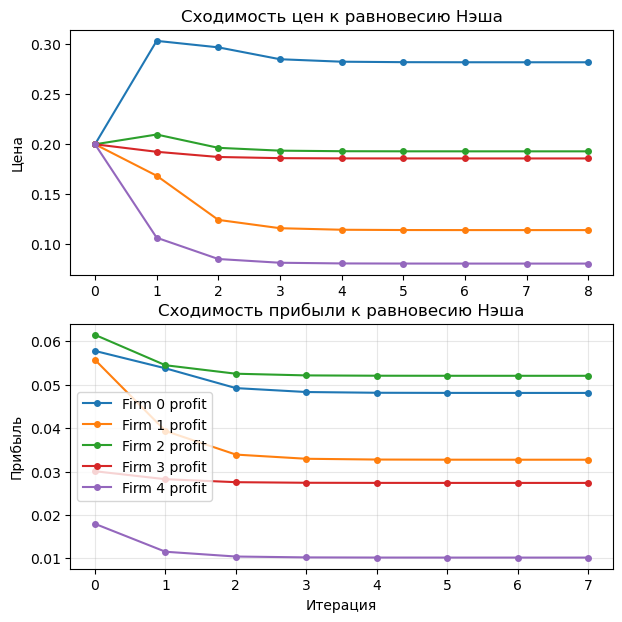

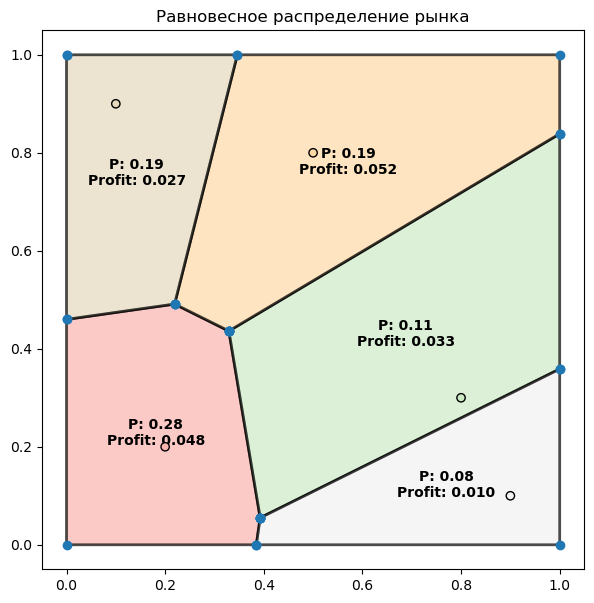

In [11]:
locs = [[0.2, 0.2], [0.8, 0.3], [0.5, 0.8], [0.1, 0.9], [0.9, 0.1]]
costs = [0] * 5

sim = HotellingSimulation(locs, costs)
nash_p, nash_profits = sim.find_equilibrium(lr=1, max_iter = 100) # Сглаживаем шаги
sim.plot_convergence()
sim.plot_final_state(nash_p)

0.00028968648892847837


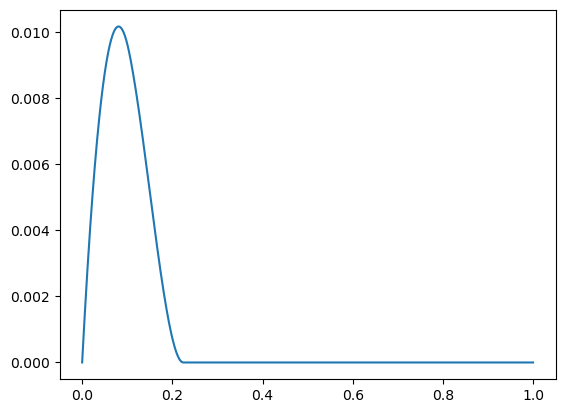

In [12]:
ind = 4
prices = nash_p.copy()
price_grid = np.linspace(0,1,1000)

profits = np.zeros(1000)

for i, price in enumerate(price_grid):

    prices[ind] = price

    regions = sim.get_regions(prices)

    profits[i] = regions[ind].area * price
    
imax = np.argmax(profits)

print(price_grid[imax] - nash_p[ind])
plt.plot(price_grid, profits)

Сходимость достигнута на шаге 11


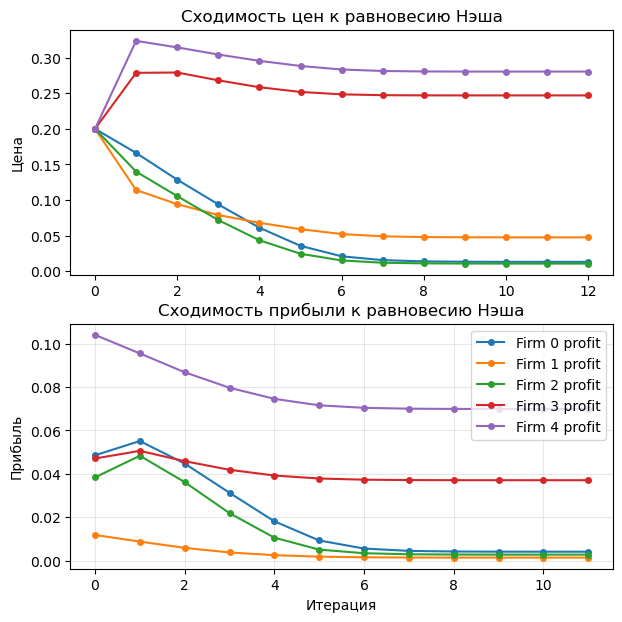

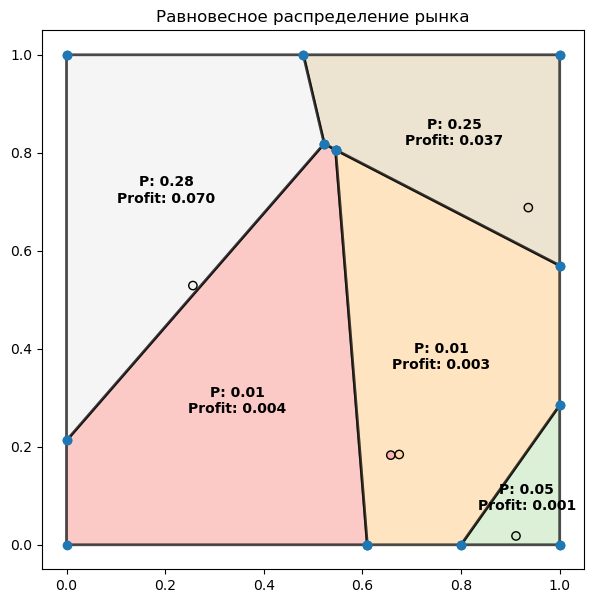

In [13]:
n = 5
locs = np.random.rand(n, 2)
costs = [0] * n

sim = HotellingSimulation(locs, costs)
nash_p, nash_profits = sim.find_equilibrium(lr=1, max_iter = 100)
sim.plot_convergence()
sim.plot_final_state(nash_p)

Starting search for ε-equilibrium (ε=1e-05)...
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 8
Сходимость достигнута на шаге 8
Сходимость достигнута на шаге 8
Сходимость достигнута на шаге 11
Сходимость достигнута на шаге 11
Сходимость достигнута на шаге 11
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 10
Сходимость достигнута на шаге 10
Сходимость достигнута на шаге 9
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 12
Сходимость достигнута на шаге 13
Сходимость достигнута на шаге 14
Сходимость достигнута на шаге 11
Сходимо

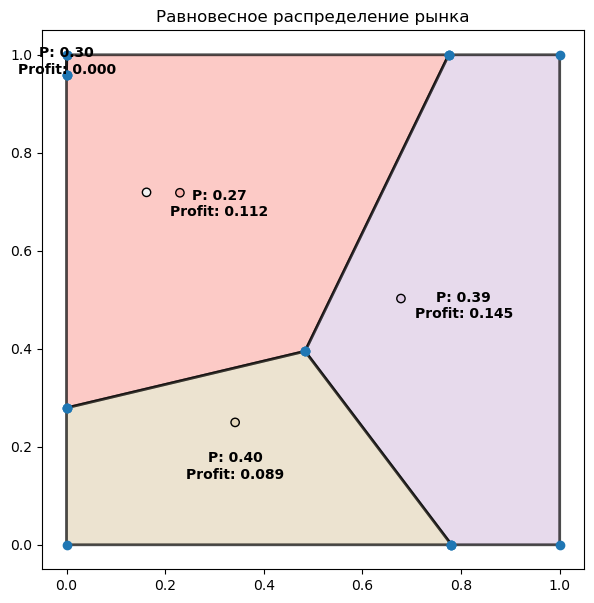

In [8]:
import numpy as np
from scipy.optimize import minimize

class FullHotellingGame:
    def __init__(self, n_agents, costs=None, epsilon=1e-4):
        self.n = n_agents
        self.costs = costs if costs is not None else np.zeros(n_agents)
        self.epsilon = epsilon
        # Начальные локации (случайные или сетка)
        self.locs = np.random.rand(n_agents, 2)
        self.current_prices = np.array([0.5] * n_agents)

    def _get_profit_for_loc(self, loc_i, agent_idx):
        """Вспомогательная функция для оптимизатора локаций"""
        temp_locs = self.locs.copy()
        temp_locs[agent_idx] = loc_i
        
        # Создаем симуляцию второго раунда
        sim = HotellingSimulation(temp_locs, self.costs)
        # Ищем равновесные цены, используя текущие как "горячий старт"
        try:
            eq_prices, profits = sim.find_equilibrium(initial_prices=self.current_prices, max_iter=100)
            return -profits[agent_idx] # Минимизируем отрицательную прибыль
        except:
            return 0

    def find_full_equilibrium(self, max_rounds=50):
        print(f"Starting search for ε-equilibrium (ε={self.epsilon})...")
        
        for r in range(max_rounds):
            total_improvement = 0
            old_locs = self.locs.copy()
            
            for i in range(self.n):
                current_profit = -self._get_profit_for_loc(self.locs[i], i)
                
                # Оптимизируем положение i-го агента
                res = minimize(
                    self._get_profit_for_loc, 
                    self.locs[i], 
                    args=(i,),
                    bounds=[(0, 1), (0, 1)],
                    method='L-BFGS-B',
                    options={'eps': 1e-3, 'gtol': 1e-4}
                )
                
                new_profit = -res.fun
                improvement = new_profit - current_profit
                
                if improvement > 0:
                    self.locs[i] = res.x
                    total_improvement += improvement
                
                # Обновляем цены для следующего шага/игрока
                sim = HotellingSimulation(self.locs, self.costs)
                self.current_prices, _ = sim.find_equilibrium(self.current_prices, max_iter=100)

            print(f"Round {r}: Total Profit Improvement = {total_improvement:.6f}")
            
            if total_improvement < self.epsilon:
                print(f"Converged to ε-equilibrium at round {r}")
                break
        else:
            print("Reached max rounds without full convergence.")
            
        return self.locs, self.current_prices

# Пример использования:
n = 4
costs = [0,0.1,0.2,0.3]
game = FullHotellingGame(n_agents=n, costs = costs, epsilon=1e-5)
final_locs, final_prices = game.find_full_equilibrium()
sim_final = HotellingSimulation(final_locs, costs)
sim_final.plot_final_state(final_prices)

In [19]:
sim_final = HotellingSimulation(final_locs, costs)
sim_final.find_profits(final_prices)

array([1.11627322e-01, 1.08155766e-01, 4.45435086e-02, 4.05437480e-10])

In [14]:
from mpl_toolkits.mplot3d import Axes3D

ind = 3
coords = np.linspace(0, 1, 40)
X, Y = np.meshgrid(coords, coords)
Z = np.zeros_like(X)

current_locs = final_locs.copy()
current_p = final_prices.copy()

print("Calculating profit landscape...")
for i in range(len(coords)):
    for j in range(len(coords)):
        test_locs = current_locs.copy()
        test_locs[ind] = [X[i, j], Y[i, j]]
        
        sim = HotellingSimulation(test_locs, costs)
        
        # Ищем равновесные цены. Горячий старт критически важен для скорости!
        try:
            nash_p, nash_profits = sim.find_equilibrium(initial_prices=current_p, max_iter=100)
            Z[i, j] = nash_profits[ind]
            # Обновляем базовую цену для следующей (соседней) точки
            current_p = nash_p 
        except:
            print("wtf?")
            Z[i, j] = 0

print("Done.")

Calculating profit landscape...
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 3
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 6
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 5
Сходимость достигнута на шаге 4
Сходимость достигнута на шаге 4
Сходимость достигнута на шаге 4
Сходимость достигнута на шаге 4
Сходимость достигнута на шаге 4
Сходимость достигнута на шаге 4
Сходимос

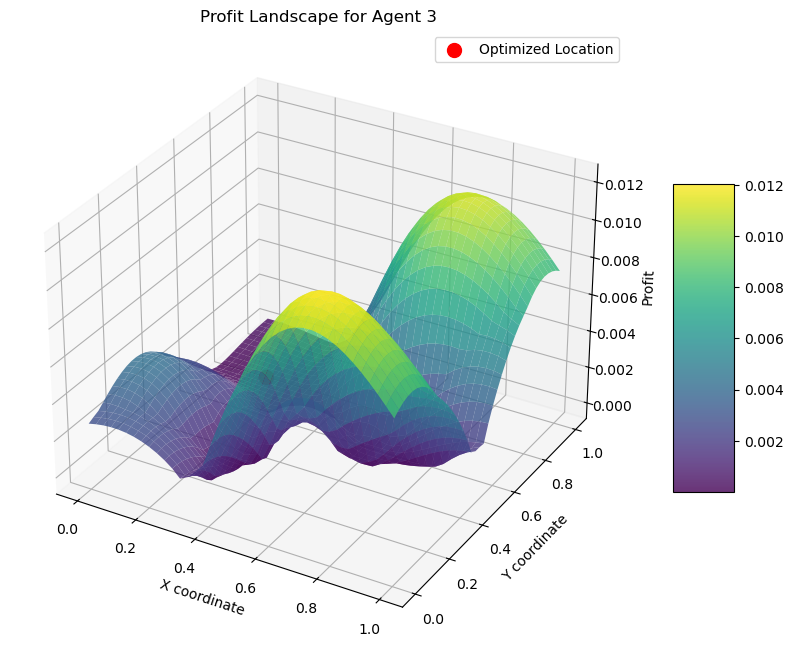

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Отмечаем точку, которую нашел алгоритм (final_locs[ind])
opt_x, opt_y = final_locs[ind]
# Находим прибыль в этой точке для оси Z
sim_check = HotellingSimulation(final_locs, costs)
opt_z = sim_check.find_profits(final_prices)[ind]

ax.scatter([opt_x], [opt_y], [opt_z], color='red', s=100, label='Optimized Location', zorder=20)

ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Profit')
ax.set_title(f'Profit Landscape for Agent {ind}')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.legend()
plt.show()

In [20]:
np.argmax(Z)

np.int64(188)

In [21]:
opt_locs = final_locs.copy()
opt_locs[ind] = [0.8, 0.9]
sim_final = HotellingSimulation(opt_locs, costs)
sim_final.find_profits(final_prices)

array([9.65512107e-02, 6.66576852e-02, 4.45435086e-02, 7.32716328e-06])

In [17]:
opt_z

np.float64(4.054374800387545e-10)